In [ ]:
Insurance Churn Data - Classification Model

In [77]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [52]:
df = pd.read_excel(r"C:\Users\Raymond\Downloads\Churn-Data.xlsx")

In [53]:
df.columns

Index(['memid', 'gender', 'isactive', 'maritalstatus', 'is_ppo',
       'is_autorenewal', 'yearsenrolled', 'Age', 'claimsdenied', 'grievances',
       'Churned?', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [54]:
df = df.drop(['Unnamed: 11', 'Unnamed: 12'], axis = 1)

In [55]:
df.rename(columns={'Churned?':'Churn'}, inplace = True )

In [56]:
df.head()

,memid,gender,isactive,maritalstatus,is_ppo,is_autorenewal,yearsenrolled,Age,claimsdenied,grievances,Churn
0,AMXM00000058356,M,no,no,yes,no,1,26,3,1,yes
1,AMXM00000058385,F,yes,no,yes,no,5,22,2,1,yes
2,AMXM00000058387,M,no,no,yes,no,2,33,1,1,yes
3,AMXM00000058389,F,yes,yes,yes,no,3,35,3,1,yes
4,AMXM00000058390,M,no,no,yes,no,3,12,4,1,yes


In [75]:
df.shape

(498, 11)

In [63]:
df.head()

,memid,gender,isactive,maritalstatus,is_ppo,is_autorenewal,yearsenrolled,Age,claimsdenied,grievances,Churn
0,AMXM00000058356,0,no,no,yes,no,1,26,3,1,yes
1,AMXM00000058385,1,yes,no,yes,no,5,22,2,1,yes
2,AMXM00000058387,0,no,no,yes,no,2,33,1,1,yes
3,AMXM00000058389,1,yes,yes,yes,no,3,35,3,1,yes
4,AMXM00000058390,0,no,no,yes,no,3,12,4,1,yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   memid           498 non-null    object
 1   gender          498 non-null    object
 2   isactive        498 non-null    object
 3   maritalstatus   498 non-null    object
 4   is_ppo          498 non-null    object
 5   is_autorenewal  498 non-null    object
 6   yearsenrolled   498 non-null    int64 
 7   Age             498 non-null    int64 
 8   claimsdenied    498 non-null    int64 
 9   grievances      498 non-null    int64 
 10  Churn           498 non-null    object
dtypes: int64(4), object(7)
memory usage: 42.9+ KB


In [58]:
#Checking for duplicate rows
dupRows = df.duplicated().sum()
print("there are " + str(dupRows) + " duplicated rows in the dataframe.")

there are 0 duplicated rows in the dataframe.


In [59]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [60]:
missing_zero_values_table(df)

Your selected dataframe has 11 columns and 498 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


Exploring Categorical Variable


In [43]:
df['is_ppo'].value_counts()

yes    395
no     103
Name: is_ppo, dtype: int64

In [ ]:
df['is_ppo'].value_counts()

In [73]:
Churn_PPO = df.groupby(['is_ppo'])['Churn'].count().reset_index().sort_values(by="Churn",ascending=False)
Churn_PPO

,is_ppo,Churn
1,yes,395
0,no,103


Text(0.5, 1.0, 'Number of churn by PPO')

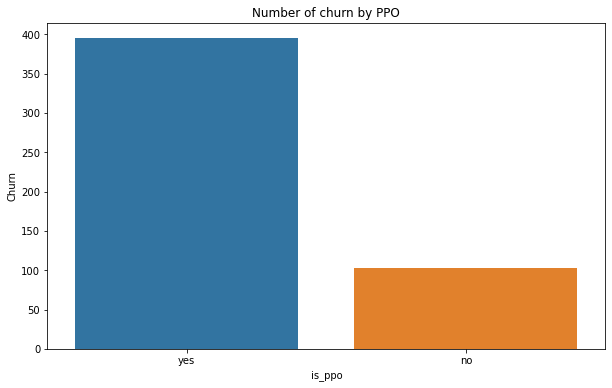

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x = Churn_PPO['is_ppo'], y = Churn_PPO['Churn'])

plt.xlabel('is_ppo')
plt.ylabel("Churn")
plt.title("Number of churn by PPO")

In [69]:
df['Churn'].replace(['no', 'yes'], [0, 1], inplace=True)

In [80]:
#Converting categorical variable to numeric

df['gender'].replace(['M', 'F'], [0, 1], inplace=True)
df['isactive'].replace(['no', 'yes'], [0, 1], inplace=True)
df['maritalstatus'].replace(['no', 'yes'], [0, 1], inplace=True)
df['is_ppo'].replace(['no', 'yes'], [0, 1], inplace=True)
df['is_autorenewal'].replace(['no', 'yes'], [0, 1], inplace=True)


In [83]:
df.head()

,memid,gender,isactive,maritalstatus,is_ppo,is_autorenewal,yearsenrolled,Age,claimsdenied,grievances,Churn
0,AMXM00000058356,0,0,0,1,0,1,26,3,1,1
1,AMXM00000058385,1,1,0,1,0,5,22,2,1,1
2,AMXM00000058387,0,0,0,1,0,2,33,1,1,1
3,AMXM00000058389,1,1,1,1,0,3,35,3,1,1
4,AMXM00000058390,0,0,0,1,0,3,12,4,1,1


In [85]:
df.corr()

,gender,isactive,maritalstatus,is_ppo,is_autorenewal,yearsenrolled,Age,claimsdenied,grievances,Churn
gender,1.000000,-0.000188,-0.104772,0.112943,-0.032209,-0.050998,-0.012018,0.019809,0.067045,-0.111214
isactive,-0.000188,1.000000,0.113795,-0.117398,0.563555,0.043768,0.119949,-0.509914,-0.497313,-0.104839
maritalstatus,-0.104772,0.113795,1.000000,0.003355,0.044841,0.095589,0.048430,-0.025335,-0.047118,-0.276539
is_ppo,0.112943,-0.117398,0.003355,1.000000,-0.080240,-0.112861,-0.184057,0.071650,0.062791,-0.430668
is_autorenewal,-0.032209,0.563555,0.044841,-0.080240,1.000000,0.055009,0.118508,-0.821455,-0.764714,-0.036525
yearsenrolled,-0.050998,0.043768,0.095589,-0.112861,0.055009,1.000000,-0.015771,-0.018193,-0.035774,-0.046893
Age,-0.012018,0.119949,0.048430,-0.184057,0.118508,-0.015771,1.000000,-0.091787,-0.085848,0.108147
claimsdenied,0.019809,-0.509914,-0.025335,0.071650,-0.821455,-0.018193,-0.091787,1.000000,0.770355,-0.008496
grievances,0.067045,-0.497313,-0.047118,0.062791,-0.764714,-0.035774,-0.085848,0.770355,1.000000,-0.046799
Churn,-0.111214,-0.104839,-0.276539,-0.430668,-0.036525,-0.046893,0.108147,-0.008496,-0.046799,1.000000


In [112]:
X = df[['is_ppo', 'maritalstatus', 'Age']].values.tolist()

In [113]:
#Normalizing our Data

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(X).transform(X)
x[0:5]

array([[ 0.51, -0.49, -0.74],
       [ 0.51, -0.49, -0.95],
       [ 0.51, -0.49, -0.36],
       [ 0.51,  2.02, -0.25],
       [ 0.51, -0.49, -1.49]])

In [114]:
Y = df['Churn'].values.tolist()
y= np.array(Y)
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print('Shape of Test data ' + str(X_test.shape))
print('Shape of Train data ' + str(X_train.shape))

Shape of Test data (100, 3)
Shape of Train data (398, 3)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [117]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8043478260869565

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 8 17]
 [ 1 74]]


Confusion matrix, without normalization
[[ 8 17]
 [ 1 74]]


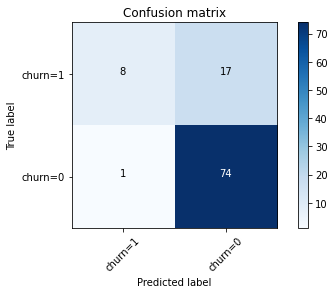

In [120]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [102]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.81      0.99      0.89        75
           1       0.89      0.32      0.47        25

    accuracy                           0.82       100
   macro avg       0.85      0.65      0.68       100
weighted avg       0.83      0.82      0.79       100

